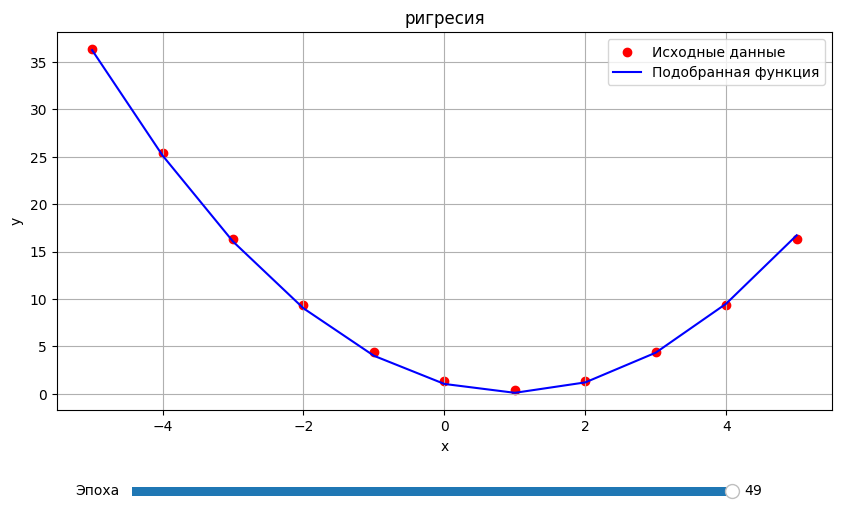

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy.optimize import curve_fit

def mse(y_true, y_pred, n):
    return sum((y_true[i] - y_pred[i])**2 for i in range(n))/n

def f(x, o, p, q):
    return o*x**2 + p*x + q

x_min = -5
x_max = 5
points = 11
x = np.linspace(x_min, x_max, points).round()


a = 1
b = -2
c = 1
e = random.uniform(-3, 3)
y = lambda x: a * x**2 + b * x + c + e

y_train = [y(i) for i in x]
y_pred = [a*i**2 + b*i + c for i in x]
MSE = mse(y_train, y_pred, points)


def get_da(x: list, y: list, a: float, b: float, c: float) -> float:
    y_pred = f(x, a, b, c)
    n = len(x)
    return (-2 / n) * np.sum(x**2 *(y_train - y_pred)) 

def get_db(x: list, y: list, a: float, b: float, c: float) -> float:
    y_pred = f(x, a, b, c)
    n = len(x)
    return (-2 / n) * np.sum((y_train - y_pred) * x)

def get_dc(x: list, y: list, a: float, b: float, c: float) -> float:
    y_pred = f(x, a, b, c)
    n = len(x)
    return (-2 / n) * np.sum((y_train - y_pred))

def fit(speed, epochs):
    a0 = 0
    b0 = 1
    c0 = 1
    history = {'a': [], 'b': [], 'c': [], 'loss': []}
    a_list = [a0]
    b_list = [b0]
    c_list = [c0]
    for i in range(epochs):
        a0 -= speed * get_da(x, y, a0, b0, c0)
        b0 -= speed * get_db(x, y, a0, b0, c0)
        c0 -= speed * get_dc(x, y, a0, b0, c0)
        history['a'].append(a0)
        history['b'].append(b0)
        history['c'].append(c0)
        a_list.append(a0)
        b_list.append(b0)
        c_list.append(c0)
    return a0, b0, c0, history

a_opt, b_opt, c_opt, history = fit(0.004, 50)

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

scatter = ax.scatter(x, y(x), color='red', label='Исходные данные')
line, = ax.plot(x, f(x, a_opt, b_opt, c_opt),
                'b-', label='Подобранная функция')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('ригресия')
ax.grid(True)
ax.legend()

ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, 'Эпоха', 0, len(history['a']) - 1,
                valinit=len(history['a']) - 1, valstep=1)

def update(val):
    epoch = int(slider.val)
    a = history['a'][epoch]
    b = history['b'][epoch]
    c = history['c'][epoch]
    line.set_ydata(f(x, a, b, c))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()